# Final Assignment 
# Machine Learning for Robotics (RO47002) 2020/2021

Group Number:

Student 1 (name + student number):

Student 2 (name + student number):

---

*Note: Please remove this cell for the submission.*

## Task Description
In this final assignment, we revisit our robot from Practicum 2, which was able to pick up a pen after you trained it to recognize parts of the pen in its camera images. Now we want to teach the robot to be able to clean up a table after a meal. In particular, it needs to be able to pick up cutlery (forks, knives, spoons).  For that the robot needs to determine where the cutlery is located and where the handle is. The robot has a basic down-facing camera that it can place on top of the desk to inspect an area of interest. Your task is to design the machine learning method for this perception problem. To simplify the problem, we'll only consider a single type of cutlery (your choice of fork, spoon, or knife) and a single object visible in each camera picture.

## Deliverables
The deadline is Sunday October 25th, 23:59. Late submission is –1 grade point per day.

The main deliverable is a Jupyter Notebook, integrating the report (markdown cells) and the code. Submission is again in the form of a single ZIP file that includes all files required to run the notebook and reproduce the results (collected images, annotation data, loadable parameters, auxiliary scripts, etc.). The notebook needs to be able to run within 10 minutes on a high-end PC, performing all steps (also including the hyperparameter optimization and training).  Unlike previous lab assignments, there are no autograded cells or asserts, but we will grade the notebook manually. Therefore, you are free to add cells as you see fit, as long as the required sections are still present in the notebook.

## Grading Criteria
Below you will find an outline of the sections that the notebook needs to contain and what we expect for each part. More specific requirements are listed there as well. The indicated number of points, out of a total of 100, should give you a rough indication on how much effort to put into each part.

In general, we will not focus as much on the performance of the method you design, but rather the _level of understanding and argumentation about your design choices_. So, we are not only interested in WHAT you did, but will put a strong emphasis on your reasoning about the WHY. Try to synthesize rather than describing what you did step by step.

### Quality of the Report (20 points)
- Structure & Readability
 - Logical flow
 - Connection between parts
- English
 - Do not use short forms, like "isn't", "wouldn't".
 - Do not use colloquial style, like "a couple of".
 - Spell check and proofread your report.
- Level of detail
 - Strive for elegant, concise text - longer reports do not necessarily yield higher grades.
 - There is no need to re-explain theory. Assume that the target audience of the report has followed the course.
- Figures & Tables
 - Choose figures/plots/tables carefully. Only include those that add to the story of the report. Do not put the burden on the reviewer to figure out which results you basing your conclusions on, but specifically refer (parts of) the specific table/plot/figure when needed.
 - When comparing two or more signals display them in one plot. Explain the colors / line types. The scale of the plots must be carefully chosen in order to clearly convey the information intended. Label properly the axes in graphs (variables and units).
- Citations
 - If you use images, theory and methods beyond what was covered in the course, etc., always reference sources.


---

*Note: Please do not include the requirements in the submission.*

# Structure (inspired by the Machine Learning Project Checklist)

## Frame the Problem and Look at the Big Picture (10 points)
- How do you frame the learning problem? Please treat the main learning problem as a supervised learning problem. But can you best express it as a classification problem, a regression problem, an image segmentation problem, etc.? Note that there is not one best answer to this question, and the task could be addressed in different ways. We want to know your motivation for your selected approach.
- What are the runtime constraints, especially for predictions? How fast does the robot need to be able to process an image? What kind of platform do you assume (e.g., Arduino, Laptop, etc.)?
- How should performance be measured? What is the minimum performance required? What are the objectives? What kind of loss function is appropriate?
- What are promising algorithms?


In [4]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


# Common imports
import numpy as np
import os, glob

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import ipywidgets
from IPython.display import display

from collections import OrderedDict

import scipy
import skimage
import skimage.transform
import skimage.util

## Get the Data (15 points)
- Collect your own dataset, i.e., take pictures of your chosen type of cutlery on a table. What was your protocol? How many pictures do you need? What kind of variations did you try to capture? What kind of potential variations are you trying to avoid to capture?
- Annotate the data. Explain which options you considered and what you did in the end. If it is a custom annotation tool, include it in the submission, if you used an external tool, a link is sufficient
- Sample a test set
- *Note:* In contrast to Practicum 2, it is sufficient to just collect a single dataset and perform the training/testing split on that.

We are using knife images for training out dataset. Different kind of knives are selected with the different background. 
Annotation tool used was the one providd with Practicum 2.
Since we are not using a dataset which is dynamic we do not need compute the hash of each instances identifier.

To avoid the data snopping error we will split the dataset with the random seed constant so that the classifier is not trained on the test data set at all. We will keep the 20% of the dataset for the test purpose and the selection of the dataset will be random after shuffiling. To get the same shuffle and the same split of the data we will keep the random state of the test_train_split function.

Finding and Loading the Image print the image to check if the database is correct.

Found 35 image files in the directory "knife_database/RAW"


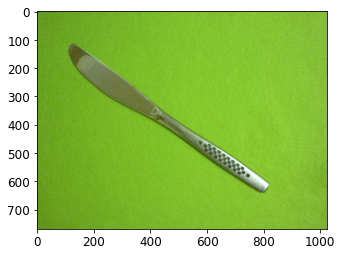

loaded 35 images
The shape of the  (35, 768, 1024, 3)
Looking for annotations file "knife_database/RAW/annots.npy": found
Loading annotations
[[119.13874797 128.51304034 794.4634233  612.66888449]
 [129.52835836 346.69485852 761.21667005 327.99355982]
 [ 92.12576096 337.8164786  715.50238433 337.8164786 ]
 [164.85303369 344.05024483 698.87900771 348.20608899]
 [166.93095576 348.20608899 921.21667005 356.5177773 ]
 [ 83.81407265 341.97232275 894.20368304 373.14115392]
 [202.25563109 306.64764743 890.04783888 325.34894613]
 [175.24264407 300.4138812  854.72316356 302.49180327]
 [173.164722   298.71377466 860.95692979 302.86961882]
 [152.38550122 336.11637206 917.06082589 342.3501383 ]
 [154.4634233  338.19429414 919.13874797 344.42806038]
 [150.30757914 398.4540344  700.95692979 406.76572271]
 [351.8660207  151.18130713 823.55433239 583.38909934]
 [418.35952719 188.58390453 850.5673194  589.62286557]
 [410.04783888 161.57091752 806.93095576 577.1553331 ]
 [401.73615057 188.58390453 781.9

In [5]:
import glob
#image check funtion
def list_images(image_dir, filename_expression='*.JPG'):
    filenames = glob.glob(os.path.join(image_dir, filename_expression))
    filenames = sorted(filenames) # important for cross-platform compatiblity
    print(f'Found {len(filenames)} image files in the directory "{image_dir}"')
    return filenames

#making the list of the filenames
IMAGE_DIR = 'knife_database/RAW'
filenames = list_images(IMAGE_DIR)
N = len(filenames)



#loading the list of the images in a single variable
Is = [plt.imread(filename) for filename in filenames]
print('loaded %d images' % len(Is))
print("The shape of the ",np.shape(Is))

#using picle module to import the annotations of the image
import pickle

annots = None # store your results in the variable `annots`
annot_filename = os.path.join(IMAGE_DIR, 'annots.npy')

annot_exists = os.path.isfile(annot_filename)
print(f'Looking for annotations file "{annot_filename}":', 'found' if annot_exists else 'NOT found')

if annot_exists:
    print('Loading annotations')
    annots = pickle.load(open(annot_filename, 'rb'))
else:
    print('Initializing empty annotations array')
    annots = np.zeros((N,4)) # x1, y1, x2, y2
    
#asserting the shape and the type of annots array
assert(type(annots) == np.ndarray)
print(annots)
assert(annots.shape == (35, 4))



## Explore the Data (5 points)
- Visualize the data
- Study its properties


We can visualize the annotaion of the data on the image of the knife.
Creat a copy fo the traing set to play with it
Since are annotaion exist for all the images therefore we do not have to fill the gaps in the data


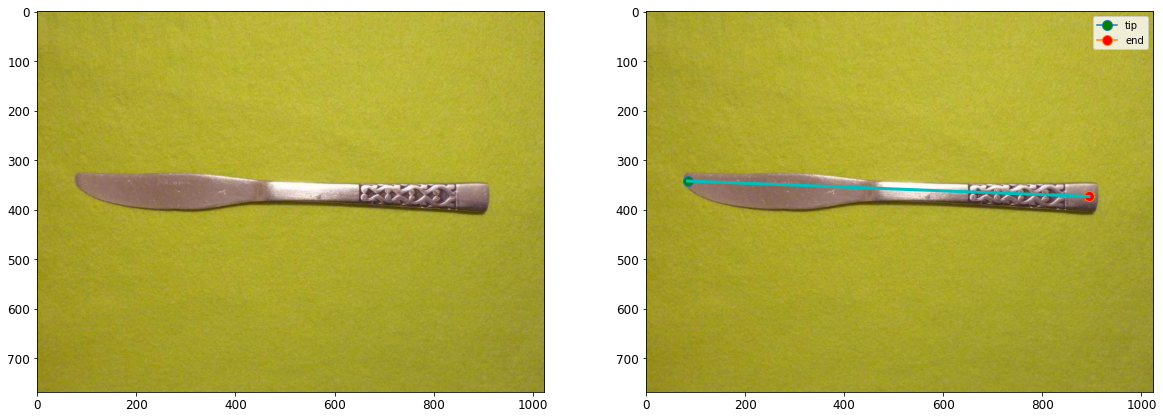

FOR THE SINGLE IMAGE
The height of the image is 768
The width of the image is 1024
The number of channel of the image is 3
The datatype of the single image is  uint8
FOR THE GROUP OF DATA
The shape of the image array is  (35, 768, 1024, 3)
The dtype of the image array is  uint8
FOR THE ANNOTATION MATRIX
The shape of the annotation matrix is (35, 4)
The datatype of the annotation matrix is  float64


In [27]:
#calculating the width and the height of the image
import numpy as np 

def show_annotation(I, p1, p2):
    plt.figure(figsize=(20,24))
    plt.subplot(1,2,1)
    plt.imshow(I)
    plt.subplot(1,2,2)
    plt.imshow(I)
    x = np.array([p1[0],p2[0]])
    y = np.array([p1[1],p2[1]])
    #2. plotting the green and the red circle
    plt.plot(p1[0],p1[1], marker="o", markersize=10, markerfacecolor="g", label="tip" )
    plt.plot(p2[0],p2[1], marker="o", markersize=10, markerfacecolor="r", label="end" )
    plt.plot(x,y, linewidth=3, color="c" )
    plt.legend(loc='upper right')
    #raise NotImplementedError()
    
    # done, show the image
    plt.show()

#Enter the index of the image to be displayed
img_idx = 5
I = Is[img_idx]
p1 = annots[img_idx,:2].copy() # copty of point 1 of the pen
p2 = annots[img_idx,2:].copy() #copy of point 2 of the pen

#calling the show_annotation function to show the orignal imge and the annotation in the image

show_annotation(I, p1, p2)

#Exploring the data of the single image
print("FOR THE SINGLE IMAGE")
print("The height of the image is",np.shape(I)[0])
print("The width of the image is",np.shape(I)[1])
print("The number of channel of the image is",np.shape(I)[2])
print("The datatype of the single image is ",I.dtype)

print("FOR THE GROUP OF DATA")
print("The shape of the image array is ",np.shape(Is))
print("The dtype of the image array is ",np.asarray(Is).dtype)

print("FOR THE ANNOTATION MATRIX")
print("The shape of the annotation matrix is",np.shape(annots))
print("The datatype of the annotation matrix is ",annots.dtype)

## Prepare the Data (10 points)
- Pre-process the data (e.g. down-sample, color channels)
- Extract features (if needed by chosen algorithms)


Use the cross validation for training and testing on the data by splitting it into subsets

## Shortlist Promising Models (15 points)
- Compare at least 2 models. One of them needs to be a neural network, one of them needs to be not a neural network.
- Perform dimensionality reduction (if needed)
- Roughly tune those models
- Evaluate the models in terms of performance, bias, variance, etc.
- Pick one algorithm to develop further


## Fine-Tune the System (15 points)
- Perform hyperparameter optimization (including pre-processing steps)
- Evaluate the final model (similar to “Shortlist Promising Models” above)
- Evaluate if your dataset was large and rich enough
- Save the parameters of your best model to your harddrive (use pickle for sklearn or built-in save/load for keras), you will need to be able to reload your model without training in the next step. Be sure to include the saved parameters in your zip file so we can evaluate your best model too even without rerunning the notebook up to here.


Use the grid search method to optimize the hyperparameter of any classifier


## Present Your Solution (10 points)
- Summarize your main decisions and insights
- Create a stand-alone demo. I.e., a block of cells that can be run on its own. For that you will need to load your pre-trained best model you saved in the previous section, measure its performance on the test set, present results both in numbers and with illustrative examples


## Further Develop Your System (Bonus, max 10 points)
- With this part you can make up for lost points in the main part. The maximum grade is still a 10. 
- Extend the system to work with either multiple types of cutlery, or multiple objects in a camera image, or different tables, or distractor objects, or different brands of your chosen type of cutlery, or a combination thereof.
